<a href="https://colab.research.google.com/github/Nabanita29/UserResponsePrediction/blob/main/User_response_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                    # Linear Algebra
import pandas as pd                   # Data processing
import matplotlib.pyplot as plt       # Visualizations
import seaborn as sns                 # Visualizations
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import warnings                       # Hide warning messages
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading the file
df = pd.read_csv(r"/content/advertising.csv")

In [3]:
# Extract datetime variables using timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Converting timestamp column into datatime object in order to extract new features
df['Month'] = df['Timestamp'].dt.month
# Creates a new column called Month
df['Day'] = df['Timestamp'].dt.day
# Creates a new column called Day
df['Hour'] = df['Timestamp'].dt.hour
# Creates a new column called Hour
df["Weekday"] = df['Timestamp'].dt.dayofweek
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
df = df.drop(['Timestamp'], axis=1) # deleting timestamp
df.head() # verifying if the variables are added to our main data frame

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4


In [4]:
# Importing train_test_split from sklearn.model_selection family
from sklearn.model_selection import train_test_split
# Assigning Numerical columns to X & y only as model can only take numbers
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']
# Splitting the data into train & test sets
# test_size is % of data that we want to allocate & random_state ensures a specific set of random splits on our data because
#this train test split is going to occur randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# We dont have to use stratify method in train_tst_split to handle class distribution as its not imbalanced and does contain equal number of classes i.e 1's and 0's
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 5) (700,)
(300, 5) (300,)


Simple Model


In [5]:
# Import LogisticRegression from sklearn.linear_model family
from sklearn.linear_model import LogisticRegression
# Instantiate an instance of the linear regression model (Creating a linear regression object)
logreg = LogisticRegression()
# Fit the model on training data using a fit method
model = logreg.fit(X_train,y_train)
model

# The predict method just takes X_test as a parameter, which means it just takes the features to draw predictions
predictions = logreg.predict(X_test)
# Below are the results of predicted click on Ads
predictions[0:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [6]:
# Importing classification_report from sklearn.metrics family
from sklearn.metrics import classification_report

# Printing classification_report to see the results
print(classification_report(y_test, predictions))

# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

[[140   6]
 [ 25 129]]


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

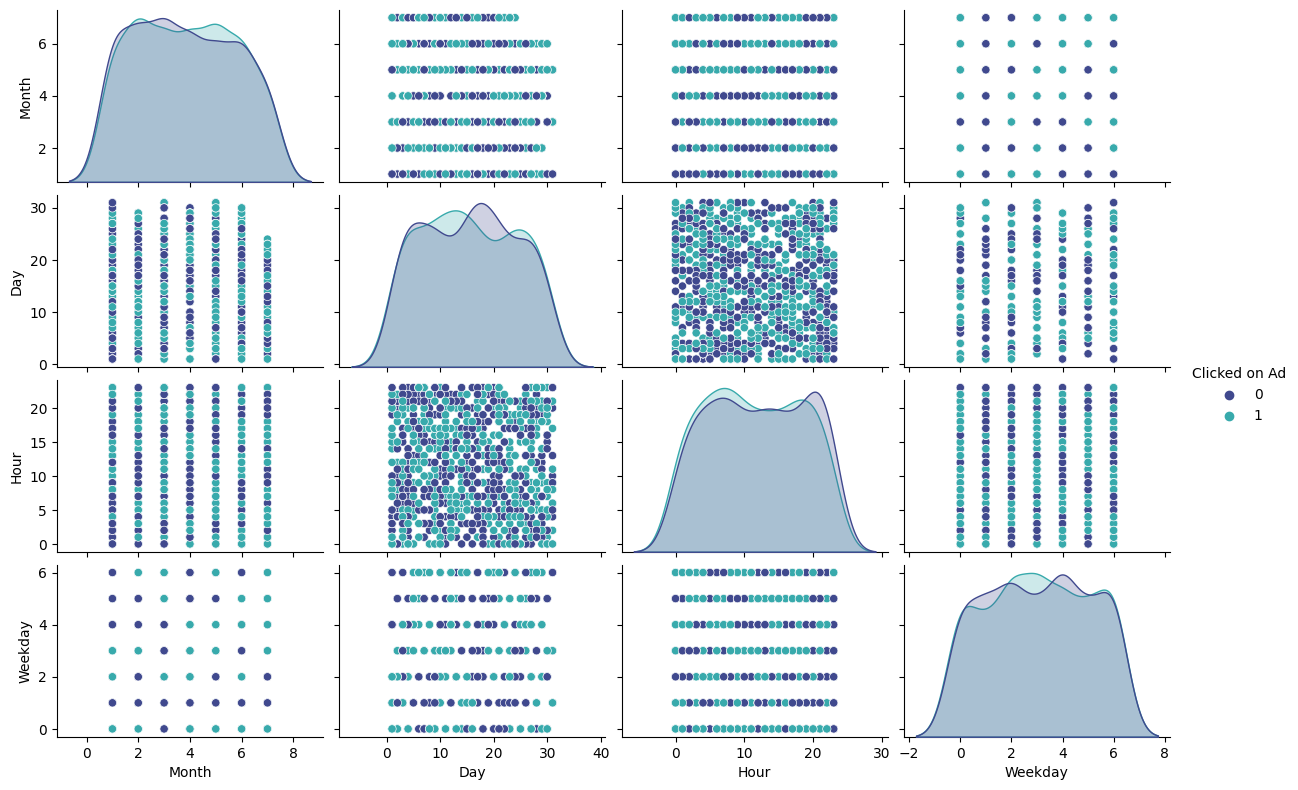

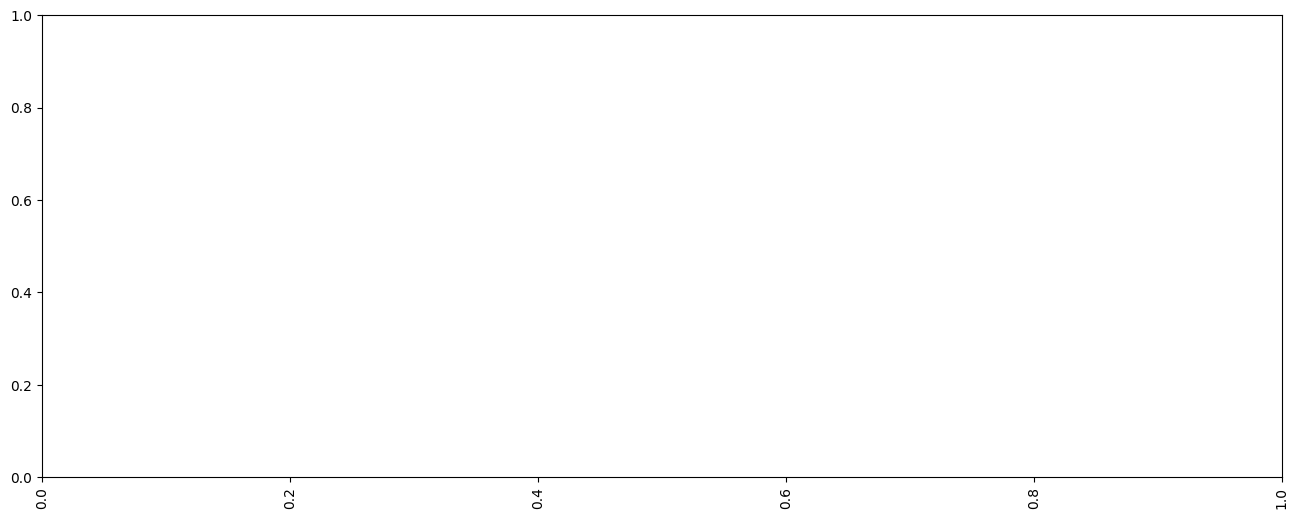

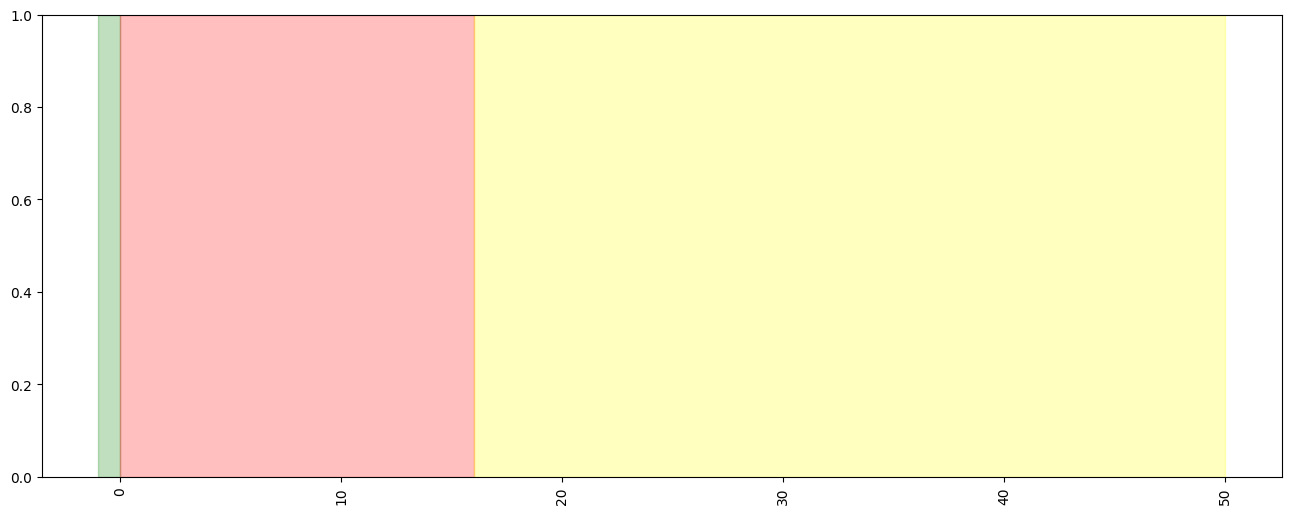

In [10]:
new_df = df.copy() # just to keep the original dataframe unchanged
# Creating pairplot to check effect of datetime variables on target variable (variables which were created)
pp = sns.pairplot(new_df, hue= 'Clicked on Ad', vars = ['Month', 'Day', 'Hour', 'Weekday'], palette = 'mako',height = 2, aspect=1.5)
# Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Month'], prefix='Month')], axis=1)
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Weekday'], prefix='Weekday')], axis=1)
# Creating buckets for hour columns based on EDA part
new_df['Hour_bins'] = pd.cut(new_df['Hour'], bins = [0, 5, 11, 17, 23],
                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)
# Dummy encoding on Hour_bins column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

# Feature engineering on Age column
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)

# checking bins
limit_1 = 18
limit_2 = 35

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(16,6))
#sns.barplot(df['age'],df['survival_7_years'], ci=None)
plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 50, alpha=0.25, color='yellow')

plt.xticks(rotation=90)

In [12]:
# Creating Bins on Age column based on above plots
new_df['Age_bins'] = pd.cut(new_df['Age'], bins=[0, 18, 30, 45, 70], labels=['Young','Adult','Mid', 'Elder'])
# Dummy encoding on Age column
new_df = pd.concat([new_df, pd.get_dummies(new_df['Age_bins'], prefix='Age')], axis=1)
# Dummy encoding on Column column based on EDA
new_df = pd.concat([new_df, pd.get_dummies(new_df['Country'], prefix='Country')], axis=1)
# Remove redundant and no predictive power features
new_df.drop(['Country', 'Ad Topic Line', 'City', 'Day', 'Month', 'Weekday',
             'Hour', 'Hour_bins', 'Age', 'Age_bins'], axis = 1, inplace = True)

Building Logistic Regression Model


In [15]:

X = new_df.drop(['Clicked on Ad'],1)
y = new_df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Standarizing the features
from  sklearn.preprocessing  import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

import  statsmodels.api  as sm
from scipy import stats

X2   = sm.add_constant(X_train_std)
est  = sm.OLS(y_train, X2)
est2 = est.fit()

# Applying logistic regression model to training data
lr = LogisticRegression(penalty="l2", C= 0.1, random_state=42)
lr.fit(X_train_std, y_train)
# Predict using model
lr_training_pred = lr.predict(X_train_std)
lr_training_prediction = accuracy_score(y_train, lr_training_pred)

print( "Accuracy of Logistic regression training set:",   round(lr_training_prediction,3))

(800, 263) (800,)
(200, 263) (200,)
Accuracy of Logistic regression training set: 0.992



Random Forest



Accuracy of Random Forest training set: 0.994
10 fold CV accuracy: 0.966 +/- 0.013
The cross validated score for Random Forest Classifier is: 96.62


Text(0.5, 1.05, 'Confusion_matrix')

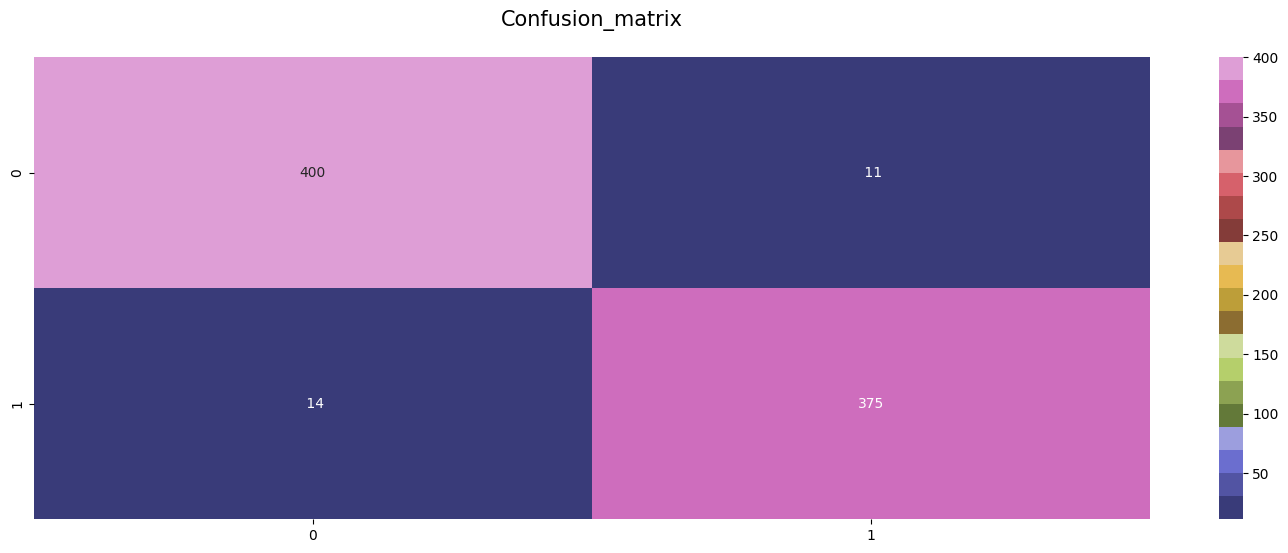

In [25]:
#predicting with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', n_estimators=400,
                                min_samples_split=10,min_samples_leaf=1,
                                max_features='auto',oob_score=True,
                                random_state=42,n_jobs=-1)
rf.fit(X_train_std,y_train)
# Predict using model
rf_training_pred = rf.predict(X_train_std)
rf_training_prediction = accuracy_score(y_train, rf_training_pred)

print("Accuracy of Random Forest training set:",   round(rf_training_prediction,3))

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, # model
                            X_train_std, # Feature matrix
                            y_train, # Target vector
                            cv=kf, # Cross-validation technique
                            scoring="accuracy", # Loss function
                            n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from sklearn.model_selection import cross_val_predict
fig = plt.figure(figsize = (18,6))
print('The cross validated score for Random Forest Classifier is:',round(scores.mean()*100,2))

y_pred = cross_val_predict(rf,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="tab20b")
plt.title('Confusion_matrix', y=1.05, size=15)


Support Vector Machine

Accuracy of Support Vector Machine training set: 0.99
10 fold CV accuracy: 0.955 +/- 0.025
The cross validated score for Support Vector Classifier is: 95.5


Text(0.5, 1.05, 'Confusion_matrix')

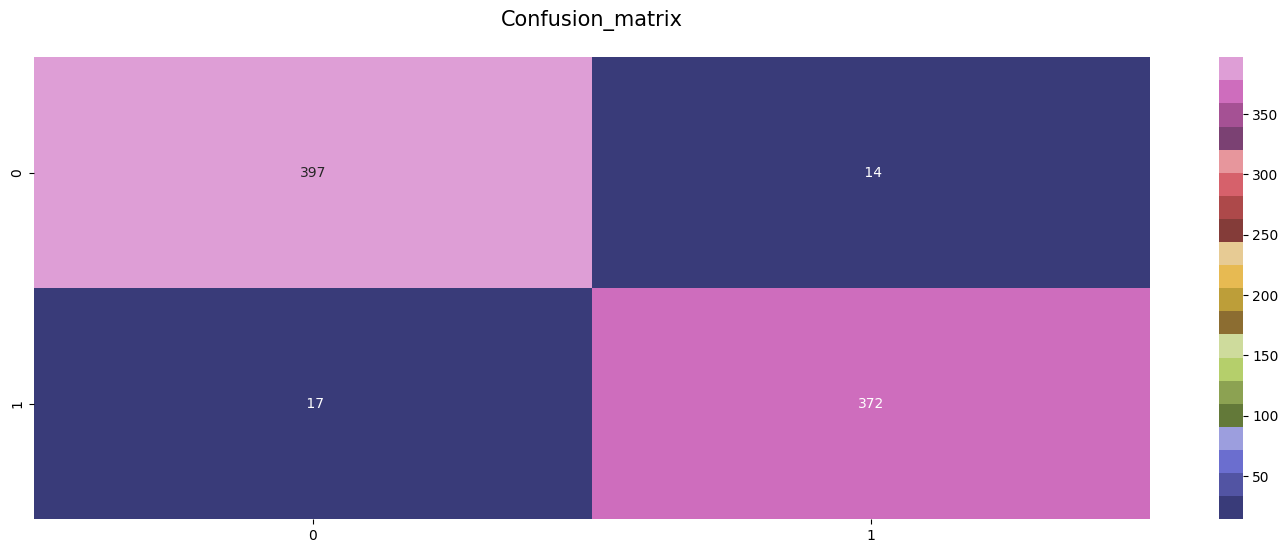

In [24]:
# predicting with support vector machine
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=0.1, random_state=42)
svc.fit(X_train_std, y_train)
# Predict using model
svc_training_pred = svc.predict(X_train_std)
svc_training_prediction = accuracy_score(y_train, svc_training_pred)

print("Accuracy of Support Vector Machine training set:",   round(svc_training_prediction,3))

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(svc, # model
                            X_train_std, # Feature matrix
                            y_train, # Target vector
                            cv=kf, # Cross-validation technique
                            scoring="accuracy", # Loss function
                            n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from sklearn.model_selection import cross_val_predict
fig = plt.figure(figsize = (18,6))
print('The cross validated score for Support Vector Classifier is:',round(scores.mean()*100,2))

y_pred = cross_val_predict(svc,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="tab20b")
plt.title('Confusion_matrix', y=1.05, size=15)


Decision Trees

Accuracy of Decision Tree training set: 0.988
10 fold CV accuracy: 0.948 +/- 0.016
The cross validated score for Decision Tree Classifier is: 94.75


Text(0.5, 1.05, 'Confusion_matrix')

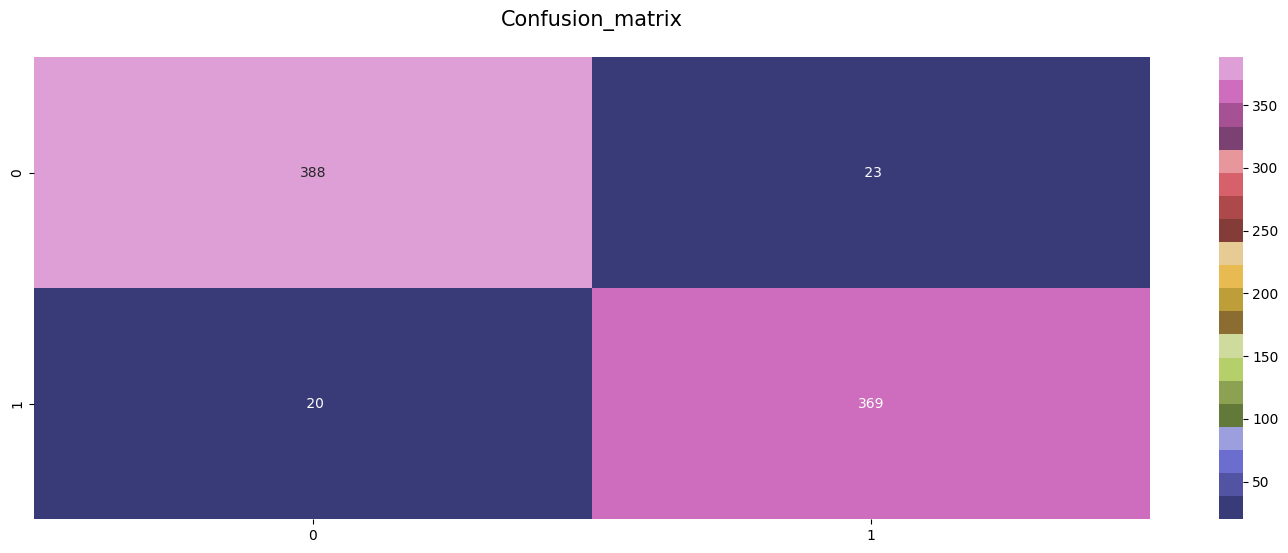

In [26]:
#predicting with decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',
                                min_samples_split=10,min_samples_leaf=1,
                                random_state=42)
dt.fit(X_train_std,y_train)
# Predict using model
dt_training_pred = dt.predict(X_train_std)
dt_training_prediction = accuracy_score(y_train, dt_training_pred)

print("Accuracy of Decision Tree training set:",   round(dt_training_prediction,3))

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt, # model
                            X_train_std, # Feature matrix
                            y_train, # Target vector
                            cv=kf, # Cross-validation technique
                            scoring="accuracy", # Loss function
                            n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from sklearn.model_selection import cross_val_predict
fig = plt.figure(figsize = (18,6))
print('The cross validated score for Decision Tree Classifier is:',round(scores.mean()*100,2))

y_pred = cross_val_predict(dt,X_train_std,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="tab20b")
plt.title('Confusion_matrix', y=1.05, size=15)


In [27]:
final_predictions = svc.predict(X)
predic = pd.DataFrame({'Predict_Click on Ad': final_predictions})
output=pd.concat([X,predic], axis=1)
output.head()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Predict_Click on Ad
0,68.95,61833.90,256.09,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
